#Método TMM
Referência utilizada:

K. -. Schlereth and M. Tacke, "The complex propagation constant of multilayer waveguides: an algorithm for a personal computer," in IEEE Journal of Quantum Electronics, vol. 26, no. 4, pp. 627-630, April 1990, doi: 10.1109/3.53377.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib import scimath as SM

# Solução analítica


In [34]:
n1 = 1.4
n2 = 1.5
n3 = 1.4
d1 = 0
d2 = 4e-6
d3 = 0
lmbd = 1.e-6

In [35]:
nmbOfPoints = 1000
k0 = 2*np.pi/lmbd
neff = np.linspace(n1*1.0001, n2*0.9999, nmbOfPoints)
beta = neff*k0

In [36]:
alpha1 = SM.sqrt(beta**2 - (k0*n1)**2)
alpha2 = SM.sqrt(beta**2 - (k0*n2)**2)
alpha3 = SM.sqrt(beta**2 - (k0*n3)**2)
sigma1 = alpha2*d1
sigma2 = alpha2*d2
sigma3 = alpha2*d3

f1 = (1+alpha2/alpha3)*(1+alpha1/alpha2)*np.exp(sigma2)
f2 = -(1-alpha2/alpha3)*(1-alpha1/alpha2)*np.exp(-sigma2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


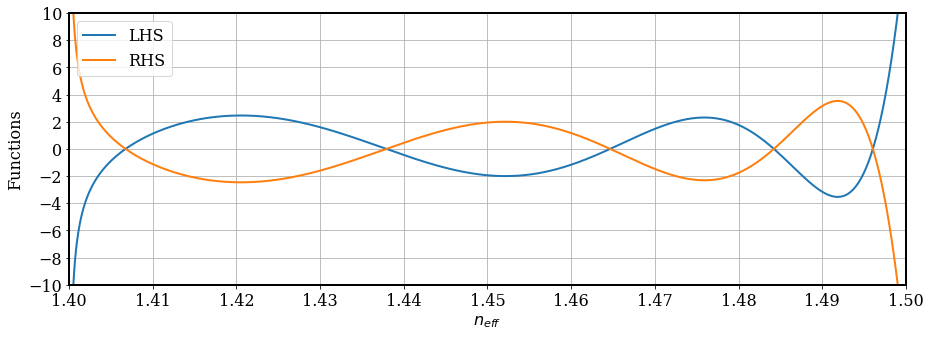

In [38]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
fig1 = plt.figure(figsize=(15,5))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

plt.plot(neff, f1, linewidth = 2, label = 'LHS')
plt.plot(neff, f2, linewidth = 2, label = 'RHS')
plt.locator_params(nbins=16)
plt.xlim([n1, n2])
plt.ylim([-10,10])
plt.xlabel(r'$n_{eff}$')
plt.ylabel('Functions')
plt.legend(loc = 'upper left')
plt.grid(True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, '$n_{eff}$')

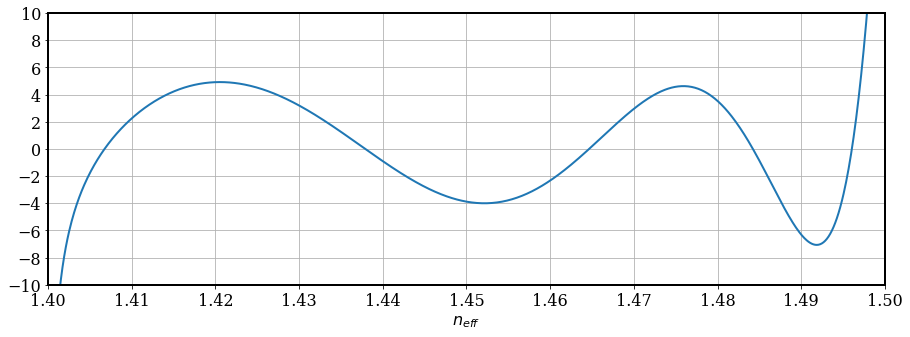

In [39]:
fig2 = plt.figure(figsize=(15,5))
plt.plot(neff, f1-f2, linewidth = 2)
plt.locator_params(nbins=16)
plt.xlim([n1, n2])
plt.ylim([-10,10])
plt.grid(True)
plt.xlabel(r'$n_{eff}$')

# TMM

In [40]:
n = np.array([1.4,1.5,1.4])
d = np.array([0,4e-6,0])
nmbOfLayers = np.size(n)

neff = np.linspace(n[0], n[1], nmbOfPoints)
beta = neff*k0

alpha = np.zeros([nmbOfPoints, nmbOfLayers], dtype=np.complex_)
sigma = np.zeros([nmbOfPoints, nmbOfLayers], dtype=np.complex_)

alpha[:,0] = SM.sqrt(beta**2 - (k0*n[0])**2)
sigma[:,0] = alpha[:,0]*d[0]
Twg = np.zeros([2, 2, nmbOfPoints], dtype=np.complex_)
Twg[0,0,:] = 1
Twg[1,1,:] = 1
Tj = np.zeros([2, 2, nmbOfPoints], dtype=np.complex_)
for i in range(nmbOfLayers-1):
  alpha[:,i+1] = SM.sqrt(beta**2 - (k0*n[i+1])**2)
  sigma[:,i+1] = alpha[:,i+1]*d[i+1]
  Tj[0,0,:] = (1+alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
  Tj[0,1,:] = (1-alpha[:,i]/alpha[:,i+1])*np.exp(-sigma[:,i])/2
  Tj[1,0,:] = (1-alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
  Tj[1,1,:] = (1+alpha[:,i]/alpha[:,i+1])*np.exp(-sigma[:,i])/2
  Twg = np.einsum('mnr,ndr->mdr', Tj, Twg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/di

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


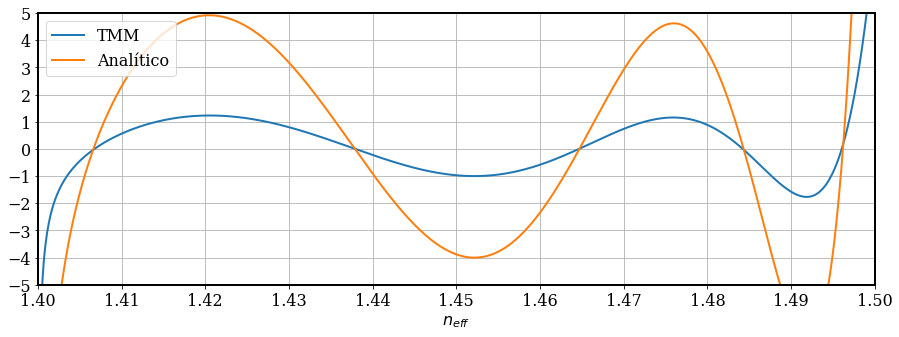

In [41]:
fig3 = plt.figure(figsize=(15,5))
plt.plot(neff, Twg[0,0,:], label = 'TMM', linewidth = 2)
plt.plot(neff, f1-f2, label = 'Analítico', linewidth = 2)
plt.locator_params(nbins=16)
plt.xlim([n1, n2])
plt.ylim([-5,5])
plt.grid(True)
plt.xlabel(r'$n_{eff}$')
plt.legend(loc = 'upper left')

In [42]:
neff = 1.484221244965693 
#1.496048287587425 - TE0
#1.484221244965693 - TE1
beta = neff*k0

alpha = SM.sqrt(beta**2 - (k0*n)**2)
sigma = alpha*d

A = np.zeros(nmbOfLayers, dtype=np.complex_)
B = np.zeros(nmbOfLayers, dtype=np.complex_)
# Equation 16
A[0] = 1
B[0] = 0

Tj = np.zeros([2, 2], dtype=np.complex_)
for i in range(nmbOfLayers-1):
  Tj[0,0] = (1+alpha[i]/alpha[i+1])*np.exp( sigma[i])/2
  Tj[0,1] = (1-alpha[i]/alpha[i+1])*np.exp(-sigma[i])/2
  Tj[1,0] = (1-alpha[i]/alpha[i+1])*np.exp( sigma[i])/2
  Tj[1,1] = (1+alpha[i]/alpha[i+1])*np.exp(-sigma[i])/2
  #Equation 13
  A[i+1] = Tj[0,0] * A[i] + Tj[0,1] * B[i]
  B[i+1] = Tj[1,0] * A[i] + Tj[1,1] * B[i]

In [43]:
t  = np.cumsum(d)
lS = np.insert(t, 0, 0)
if d[0] == 0.0:
    csL = 2e-6
    t = np.insert(t, 0, -csL)
    t[-1] = t[-1] + csL
else:
    t = np.insert(t, 0, 0)
    t[-1] = t[-1] + d[-1]

Text(0, 0.5, 'Field amplitude')

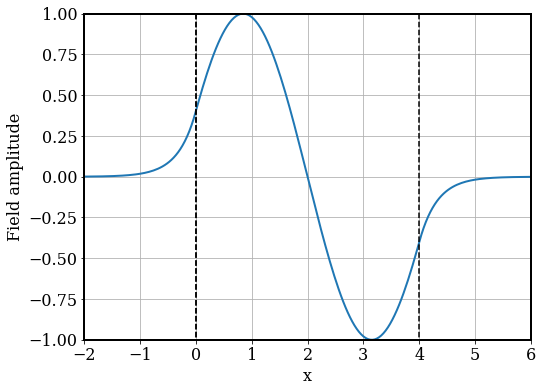

In [44]:
dx = np.sum(d)/100
Ey_j = []
lent = []
for i in range(nmbOfLayers):
    len = np.arange(t[i], t[i+1], dx)
    # Equation 4
    E_temp = A[i] * np.exp(+alpha[i] * (len - lS[i])) + B[i] * np.exp(-alpha[i] * (len - lS[i]))
    Ey_j = np.hstack((Ey_j, E_temp))
    lent = np.hstack((lent, len))

fig4 = plt.figure(figsize=(8,6))
plt.plot(lent/1e-6, np.real(Ey_j/Ey_j.max()), linewidth = 2)
for i in range(nmbOfLayers):
  plt.plot(np.array([lS[i],lS[i]])/1e-6, [-1.5,1.5], 'k--')
plt.grid()
plt.xlim([lent.min()/1e-6,lent.max()/1e-6])
plt.ylim([-1,1])
plt.xlabel('x')
plt.ylabel('Field amplitude')

# Exemplo: Laser

In [45]:
n = np.array([2.6-36.5j, 4.6, 5.2, 4.6, 5.2-0.01j])
d = np.array([0,2e-6,0.5e-6,4e-6,1.5e-6])
lmbd = 6.7e-6
k0 = 2*np.pi/lmbd

nmbOfLayers = np.size(n)

neff = np.linspace(4.6*1.0001, 5.2*0.9999, nmbOfPoints)
beta = neff*k0

alpha = np.zeros([nmbOfPoints, nmbOfLayers], dtype=np.complex_)
sigma = np.zeros([nmbOfPoints, nmbOfLayers], dtype=np.complex_)

alpha[:,0] = SM.sqrt(beta**2 - (k0*n[0])**2)
sigma[:,0] = alpha[:,0]*d[0]
Twg = np.zeros([2, 2, nmbOfPoints], dtype=np.complex_)
Twg[0,0,:] = 1
Twg[1,1,:] = 1
Tj = np.zeros([2, 2, nmbOfPoints], dtype=np.complex_)
for i in range(nmbOfLayers-1):
  alpha[:,i+1] = SM.sqrt(beta**2 - (k0*n[i+1])**2)
  sigma[:,i+1] = alpha[:,i+1]*d[i+1]
  Tj[0,0,:] = (1+alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
  Tj[0,1,:] = (1-alpha[:,i]/alpha[:,i+1])*np.exp(-sigma[:,i])/2
  Tj[1,0,:] = (1-alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
  Tj[1,1,:] = (1+alpha[:,i]/alpha[:,i+1])*np.exp(-sigma[:,i])/2
  Twg = np.einsum('mnr,ndr->mdr', Tj, Twg)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


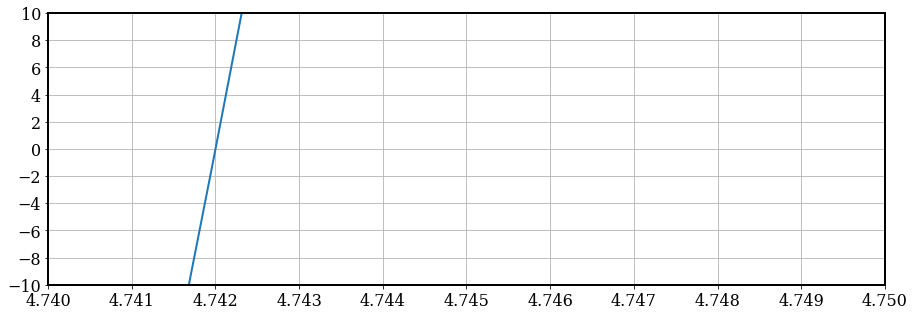

In [47]:
fig5 = plt.figure(figsize=(15,5))
plt.plot(neff, Twg[0,0,:], linewidth = 2)
plt.xlim([4.6, 5.2])
plt.locator_params(nbins=16)
plt.ylim([-10,10])
plt.xlim([4.74,4.75])
plt.grid(True)

In [48]:
neff = 4.742
beta = neff*k0

alpha = SM.sqrt(beta**2 - (k0*n)**2)
sigma = alpha*d

A = np.zeros(nmbOfLayers, dtype=np.complex_)
B = np.zeros(nmbOfLayers, dtype=np.complex_)
A[0] = 1
B[0] = 0

Tj = np.zeros([2, 2], dtype=np.complex_)
for i in range(nmbOfLayers-1):
  Tj[0,0] = (1+alpha[i]/alpha[i+1])*np.exp( sigma[i])/2
  Tj[0,1] = (1-alpha[i]/alpha[i+1])*np.exp(-sigma[i])/2
  Tj[1,0] = (1-alpha[i]/alpha[i+1])*np.exp( sigma[i])/2
  Tj[1,1] = (1+alpha[i]/alpha[i+1])*np.exp(-sigma[i])/2
  A[i+1] = Tj[0,0] * A[i] + Tj[0,1] * B[i]
  B[i+1] = Tj[1,0] * A[i] + Tj[1,1] * B[i]

In [49]:
t  = np.cumsum(d)
lS = np.insert(t, 0, 0)
if d[0] == 0.0:
    csL = 2e-6
    t = np.insert(t, 0, -csL)
    t[-1] = t[-1] + csL
else:
    t = np.insert(t, 0, 0)
    t[-1] = t[-1] + d[-1]

Text(0, 0.5, 'Field amplitude')

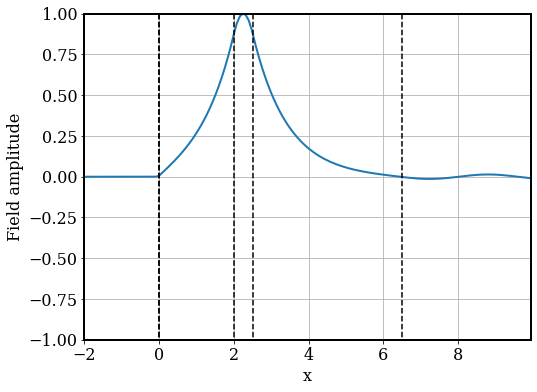

In [50]:
dx = np.sum(d)/100
Ey_j = []
lent = []
for i in range(nmbOfLayers):
    len = np.arange(t[i], t[i+1], dx)
    E_temp = A[i] * np.exp(+alpha[i] * (len - lS[i])) + B[i] * np.exp(-alpha[i] * (len - lS[i]))
    Ey_j = np.hstack((Ey_j, E_temp))
    lent = np.hstack((lent, len))

fig5 = plt.figure(figsize=(8,6))
plt.plot(lent/1e-6, np.real(Ey_j/Ey_j.max()), linewidth = 2)
for i in range(nmbOfLayers):
  plt.plot(np.array([lS[i],lS[i]])/1e-6, [-1.5,1.5], 'k--')
plt.grid()
plt.xlim([lent.min()/1e-6,lent.max()/1e-6])
plt.ylim([-1,1])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Field amplitude')